

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score,classification_report,plot_roc_curve

from scipy.stats import zscore
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE



In [2]:
from imblearn.pipeline import Pipeline, make_pipeline

In [3]:
df=pd.read_csv("loan_prediction.csv",index_col="Unnamed: 0")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.471735,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


we want to predict whether  the loan of the applicant will be approved or not on the basis of the details provided in the dataset.
So this is a classification algorithm

In [5]:
df.shape

(614, 13)

614*13 is the size of the dataset

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 67.2+ KB


Loan_ID', 'Gender', 'Married', '', 'Education','Self_Employed', , 'Property_Area', 'Loan_Status' are categorical columns
Dependents should be a numeric column, due to missing values it is being shown as object
        
'ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term', Credit_History  are numeric columns.

In [8]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some missing data in some features like 
Gender has 13, Married has 3 , dependents has 15 , self employed has 32, loan amount has 22, 
loan amount term 14, credit history has 50 missing values

## EDA

In [9]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

as most of the values are Male, filling missing values with Male

In [10]:
df['Gender'].fillna('Male',inplace=True)

In [11]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

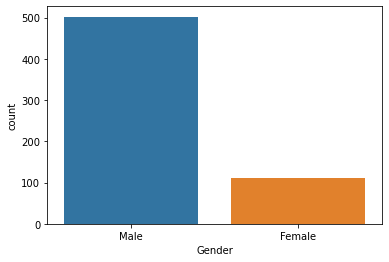

In [12]:
sns.countplot(df['Gender'])

In [13]:
df['Married'].value_counts()

Yes    400
No     214
Name: Married, dtype: int64

In [14]:
df.groupby('Gender')['Married'].value_counts()

Gender  Married
Female  No          81
        Yes         31
Male    Yes        369
        No         133
Name: Married, dtype: int64

Most of the females are not married and most of the males are married so filliing married feature with respect to Gender

In [15]:
df['Married']=df['Married'].astype('str')

In [16]:
df[df['Married']=='nan']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [17]:
sum(df['Married']=="nan")

0

In [18]:
def x(y):
    if y['Married']=="nan":
        if y['Gender']=='Male':
            y['Married']='Yes'
        else:
            y['Married']='No'
    return y

In [19]:
df=df.apply(x,axis=1)

In [20]:
df['Married'].isnull().sum()

0

In [21]:
df.iloc[[104,228,435]]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,Yes,0,Graduate,No,3816,754.0,160.000000,360.0,1.0,Urban,Y
228,LP001760,Male,Yes,0,Graduate,No,4758,0.0,158.000000,480.0,1.0,Semiurban,Y
435,LP002393,Female,No,0,Graduate,No,10047,0.0,142.471735,240.0,1.0,Semiurban,Y


In [22]:
df['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [23]:
df['Dependents']=df['Dependents'].replace('3+',3)

In [24]:
df['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [25]:
df['Dependents'].fillna(df['Dependents'].mode()[0] , inplace = True)


In [26]:
sum(df['Dependents'].isnull())

0

In [27]:
df['Dependents']=df['Dependents'].astype('int32')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

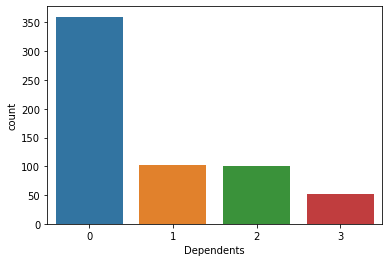

In [28]:
sns.countplot(df['Dependents'])

In [29]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [30]:
df.groupby('Gender')['Self_Employed'].value_counts()

Gender  Self_Employed
Female  No                97
        Yes               15
Male    No               435
        Yes               67
Name: Self_Employed, dtype: int64

In both males and females self employed No is highest so filling missing values with No

In [31]:
df['Self_Employed'].fillna('No',inplace = True)

In [32]:
df.groupby('Gender')['LoanAmount'].mean()

Gender
Female    127.383424
Male      150.661393
Name: LoanAmount, dtype: float64

In [33]:
df.groupby('Self_Employed')['LoanAmount'].mean()

Self_Employed
No     142.471735
Yes    172.000000
Name: LoanAmount, dtype: float64

filling loan amount missing values based on self employed is correct as self employeed - have more loan amount and others have less loan amount

In [34]:
df[df['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [35]:
df['LoanAmount']=df.groupby('Self_Employed')['LoanAmount'].transform(lambda val: val.fillna(val.mean()))

In [36]:
df.iloc[[0,35,63]]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.471735,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,142.471735,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,142.471735,360.0,0.0,Rural,N


<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

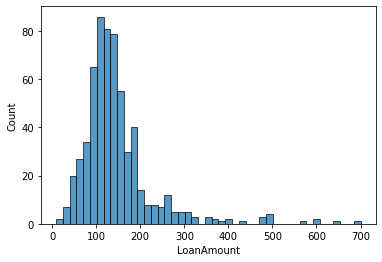

In [37]:
sns.histplot(df['LoanAmount'])

In [38]:
df[df['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [39]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [40]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0] , inplace = True)

loan amount term 14, credit history has 50 missing values

In [41]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [42]:
df['Credit_History'].fillna(df['Credit_History'].max() , inplace = True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 80.9+ KB


In [44]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [45]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)


['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


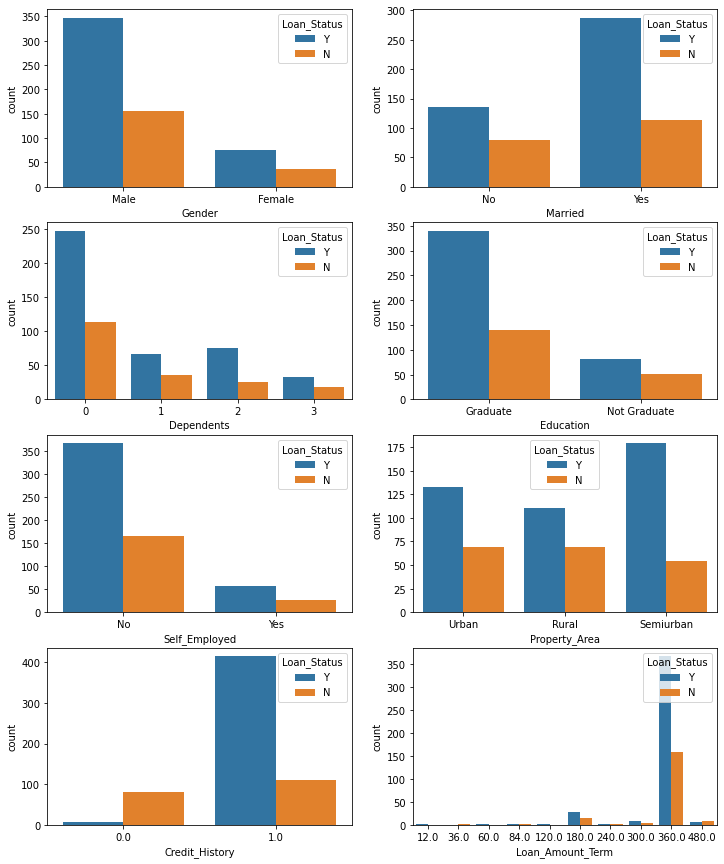

In [46]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])

Sex: Men have more loan applicants than females
Martial Status:married people have more loand approved
Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
Education: More graduates apply for loans and graduates have more loans approved.
Employment: Most of the population is self employed and approval rate is more for self empluyed
Property Area: More applicants from Semi-urban and also likely to be granted loans.
More People with credit history apply for loans and also likely to be accepted.
Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

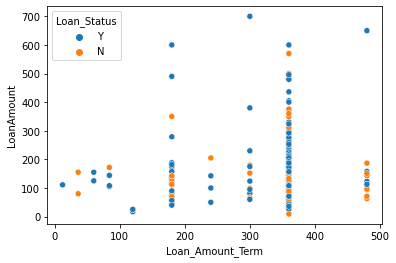

In [47]:
sns.scatterplot(data=df,y='LoanAmount',x='Loan_Amount_Term',hue='Loan_Status')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

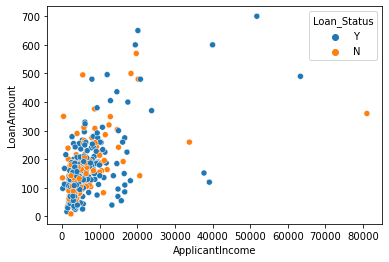

In [48]:
sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount',hue='Loan_Status')

In [49]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Loan_id is only a identifier, so dropping it

In [50]:
df=pd.get_dummies(df.drop(['Loan_ID'],axis=1),drop_first=True)

In [51]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,142.471735,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1,1


In [52]:
numerical_columns

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [53]:
df[numerical_columns+['Loan_Status_Y','Loan_Amount_Term']].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status_Y,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.565504,-0.004710,-0.046531
CoapplicantIncome,-0.116605,1.000000,0.187158,-0.059187,-0.059383
LoanAmount,0.565504,0.187158,1.000000,-0.035804,0.037045
Loan_Status_Y,-0.004710,-0.059187,-0.035804,1.000000,-0.022549
Loan_Amount_Term,-0.046531,-0.059383,0.037045,-0.022549,1.000000


<AxesSubplot:>

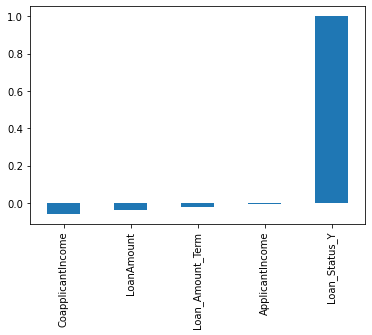

In [54]:
df[numerical_columns+['Loan_Status_Y']+['Loan_Amount_Term']+['Credit_History']].corr()['Loan_Status_Y'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

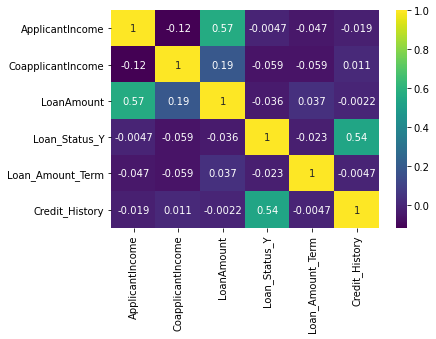

In [55]:
sns.heatmap(df[numerical_columns+['Loan_Status_Y']+['Loan_Amount_Term']+['Credit_History']].corr(),annot=True,cmap='viridis')

From corelation matrix it is clear that Loan Approval Status is strongly correlated with the credit history of the people in the past.
and other factors are negatively corelated

splitting into X and y features

In [56]:
df.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [57]:
X=df.drop('Loan_Status_Y',axis=1)
y=df['Loan_Status_Y']

# Applying different machine learning models now

## identifying the best random state

In [58]:
max_accu=0
maxRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    pred=dt.predict(X_test)
    accurac=accuracy_score(y_test,pred)
    #print(accurac*100,"at random state",i)
    if(accurac>max_accu):
        max_accu=accurac
        maxRS=i
        
print("best accuracy is",max_accu,"on random state",maxRS)

best accuracy is 0.7783251231527094 on random state 163


best accuracy is 0.7733990147783252 on random state 183

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=183)

**TASK: Scale the X train and X test data.**

oversampling the triaing set, after the split of data into training and validation set

In [60]:
y_train.value_counts()

1    273
0    138
Name: Loan_Status_Y, dtype: int64

In [61]:
smt=SMOTE()
X_resample,y_resample=smt.fit_resample(X_train,y_train)

In [62]:
scaler = StandardScaler()

In [63]:
scaled_X_train = scaler.fit_transform(X_resample)
scaled_X_test = scaler.transform(X_test)

In [64]:
DTC=DecisionTreeClassifier()
DTC.fit(scaled_X_train,y_resample)
pred=DTC.predict(scaled_X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.54      0.70      0.61        54
           1       0.88      0.78      0.83       149

    accuracy                           0.76       203
   macro avg       0.71      0.74      0.72       203
weighted avg       0.79      0.76      0.77       203



In [65]:
RFC=RandomForestClassifier()
RFC.fit(scaled_X_train,y_resample)
pred=RFC.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60        54
           1       0.85      0.86      0.86       149

    accuracy                           0.79       203
   macro avg       0.73      0.73      0.73       203
weighted avg       0.79      0.79      0.79       203



In [66]:
svc=SVC()
svc.fit(scaled_X_train,y_resample)
pred=svc.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58        54
           1       0.85      0.82      0.84       149

    accuracy                           0.76       203
   macro avg       0.70      0.71      0.71       203
weighted avg       0.77      0.76      0.77       203



In [67]:
ada=AdaBoostClassifier()
ada.fit(scaled_X_train,y_resample)
pred=ada.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63        54
           1       0.87      0.85      0.86       149

    accuracy                           0.80       203
   macro avg       0.74      0.75      0.75       203
weighted avg       0.80      0.80      0.80       203



In [69]:
dtcAC=0.76
rfcAC=0.79
svcAC=0.86
adaAC=0.80

### now checking cross val score

In [70]:
imba_pipeline=make_pipeline(scaler,SMOTE(random_state=42),DTC)
DTCcv=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
DTCcv

0.6497208345577432

In [71]:
imba_pipeline=make_pipeline(scaler,SMOTE(random_state=42),RFC)
RFCcv=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
RFCcv

0.7153394064061123

In [72]:
imba_pipeline=make_pipeline(scaler,SMOTE(random_state=42),svc)
svcCV=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
svcCV

0.7005877167205408

In [73]:
imba_pipeline=make_pipeline(scaler,SMOTE(random_state=42),ada)
adaCV=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
adaCV

0.7347634440199824

In [74]:
print(dtcAC-DTCcv)
print(rfcAC-RFCcv)
print(svcAC-svcCV)
print(adaAC-adaCV)

0.1102791654422568
0.07466059359388777
0.15941228327945922
0.06523655598001765


Ada Boost classifier has the less difference between the accuracy scores( on test set) and Cross val score(on validation), so it is the best model

## HyperParameterTuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
pipeLine=Pipeline([('scaler',StandardScaler()),('smote',SMOTE(random_state=42)),('ada',AdaBoostClassifier())])


In [77]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting is requi

In [78]:
param_grid = {'ada__learning_rate':[0.01,0.1,1],'ada__algorithm':['SAMME','SAMME.R']}
grid = GridSearchCV(pipeLine,param_grid,verbose=2)

In [79]:
grid.fit(X_train,y_train,)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......ada__algorithm=SAMME, ada__learning_rate=0.01; total time=   0.1s
[CV] END ......ada__algorithm=SAMME, ada__learning_rate=0.01; total time=   0.1s
[CV] END ......ada__algorithm=SAMME, ada__learning_rate=0.01; total time=   0.1s
[CV] END ......ada__algorithm=SAMME, ada__learning_rate=0.01; total time=   0.1s
[CV] END ......ada__algorithm=SAMME, ada__learning_rate=0.01; total time=   0.1s
[CV] END .......ada__algorithm=SAMME, ada__learning_rate=0.1; total time=   0.1s
[CV] END .......ada__algorithm=SAMME, ada__learning_rate=0.1; total time=   0.1s
[CV] END .......ada__algorithm=SAMME, ada__learning_rate=0.1; total time=   0.1s
[CV] END .......ada__algorithm=SAMME, ada__learning_rate=0.1; total time=   0.1s
[CV] END .......ada__algorithm=SAMME, ada__learning_rate=0.1; total time=   0.1s
[CV] END .........ada__algorithm=SAMME, ada__learning_rate=1; total time=   0.1s
[CV] END .........ada__algorithm=SAMME, ada__lear

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('ada', AdaBoostClassifier())]),
             param_grid={'ada__algorithm': ['SAMME', 'SAMME.R'],
                         'ada__learning_rate': [0.01, 0.1, 1]},
             verbose=2)

In [80]:
grid.best_params_

{'ada__algorithm': 'SAMME', 'ada__learning_rate': 0.01}

In [81]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('ada',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01))])

In [82]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ada__algorithm,param_ada__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.150360,0.012968,0.015063,0.002999,SAMME,0.01,"{'ada__algorithm': 'SAMME', 'ada__learning_rat...",0.759036,0.768293,0.841463,0.743902,0.829268,0.788393,0.039326,1
1,0.147951,0.005809,0.011120,0.003599,SAMME,0.1,"{'ada__algorithm': 'SAMME', 'ada__learning_rat...",0.759036,0.768293,0.841463,0.743902,0.829268,0.788393,0.039326,1
2,0.148819,0.007114,0.016020,0.003630,SAMME,1,"{'ada__algorithm': 'SAMME', 'ada__learning_rat...",0.819277,0.707317,0.756098,0.707317,0.780488,0.754099,0.043187,5
3,0.124033,0.032801,0.012892,0.004841,SAMME.R,0.01,"{'ada__algorithm': 'SAMME.R', 'ada__learning_r...",0.759036,0.768293,0.841463,0.743902,0.829268,0.788393,0.039326,1
4,0.118668,0.032256,0.011906,0.004218,SAMME.R,0.1,"{'ada__algorithm': 'SAMME.R', 'ada__learning_r...",0.783133,0.731707,0.804878,0.756098,0.743902,0.763944,0.026632,4
5,0.151646,0.014895,0.021129,0.007714,SAMME.R,1,"{'ada__algorithm': 'SAMME.R', 'ada__learning_r...",0.746988,0.695122,0.756098,0.731707,0.743902,0.734763,0.021302,6


### Displaying the confusion matrix and classification report

In [83]:
from sklearn.metrics import confusion_matrix,classification_report

In [84]:
grid_pred = grid.predict(X_test)

In [85]:
confusion_matrix(y_test,grid_pred)

array([[ 25,  29],
       [  1, 148]], dtype=int64)

In [86]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62        54
           1       0.84      0.99      0.91       149

    accuracy                           0.85       203
   macro avg       0.90      0.73      0.77       203
weighted avg       0.87      0.85      0.83       203



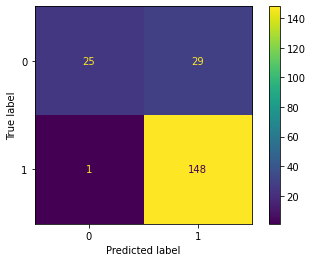

In [87]:
plot_confusion_matrix(grid,X_test,y_test)

## Training with best params

In [91]:
pipeLine=Pipeline([('scaler',StandardScaler()),('smote',SMOTE(random_state=42)),('ada',AdaBoostClassifier(learning_rate=0.01,algorithm='SAMME'))])

param_grid = {'ada__learning_rate':[0.01],'ada__algorithm':['SAMME']}


In [92]:
Final_model=pipeLine
Final_model.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('ada',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01))])

In [93]:

pred=Final_model.predict(X_test)
accuracyScore=accuracy_score(y_test,pred)
print(accuracyScore)

0.8522167487684729


final accuracy achieved is 85.2% with Ada Boost Classifier

## plotting AUC ROC CURVE

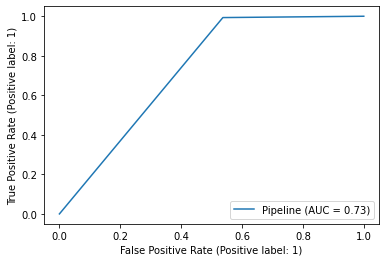

In [94]:
plot_roc_curve(Final_model,X_test,y_test)

AUC-ROC Curve area is 0.73 which is good.

## saving the model


In [96]:
import joblib
joblib.dump(Final_model,"Loan_Application_status_Pred.pkl")

['Loan_Application_status_Pred.pkl']